# Guided Project: Predicting Heart Disease with Classification using Logistic Regression

## Table of Contents 
1. [Introduction](#introduction)
2. [Understanding the Data](#understanding-data)
3. [EDA: Descriptive Statistics](#eda-descr)
5. [EDA:Visualisations and More Analysis](#eda-vis)
6. [Feature Selection](#feat-selec)
7. [Dividing the Data](#div-data)
8. [Building the Model](#build-mod)
9. [Interpreting the Intercept](#interpret)
10. [Model Evaluation on Test Set](#model-eval)
11. [Final Conclusions](#final)

## Introduction <a name="introduction"></a>

![human-heart-design_1048-1855.png](img/predictheartdisease/human-heart-design_1048-1855.png)

Image source: [User: fedesoriano, kaggle.com](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

This is a project I completed based on a guide called "Predicting Heart Disease" on the Dataquest learning platform. In contrast to a previous project with a similar name, it uses classification based on logistic regression.

In this project I have learned new skills related to Machine Learning in Python. 

The implementation is written in Python and is shown in Jupyter Notebooks.

### Goal of this project

The World Health Organization (WHO) estimates that 17.9 million people die from cardiovascular diseases (CVDs) every year.

There are multiple risk factors that could contribute to CVD in an individual, such as unhealthy diet, lack of physical activity, or mental illness. Identifying these risk factors early on could help prevent many premature deaths.

## Understanding the Data <a name="understanding-data"></a>

This [dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) comes from the famous Cleveland Clinic Foundation, which recorded information on various patient characteristics, including age and cholesterol, to try to classify the presence of heart disease in an individual. This a prime example of how machine learning can help solve problems that have a real impact on people's lives. 
Note: the dataset apparently has missing values. We'll need to check for that.

#### Data dictionary
We are tasked with using the dataset to accurately predict the likelihood of a new patient having heart disease in the future. Here is the documentation of the dataset:

* `age`: age in years
* `sex`: sex (1 = male; 0 = female)
* `cp`: chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 4 = asymptomatic)
* `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
* `chol`: serum cholesterol in mg/dl
* `fbs`: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
* `restecg`: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV); 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* `thalach`: maximum heart rate achieved
* `exang`: exercise induced angina (1 = yes; 0 = no)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment (0 = upsloping; 1 = flat; 2 = downsloping)
* `ca`: number of major vessels (0-3) coloured by fluoroscopy
* `thal`: 3 = normal; 6 = fixed defect; 7 = reversible defect
* `present`: diagnosis of heart disease (angiographic disease status) (0 = no; 1 = yes)


### Import the dependencies
First we need to import the libraries we think will at minimum be required for this project: pandas, numpy and matplotlib.pyplot.


In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load and explore the data
The heart disease observations are stored in 1 file.
1. heart_disease.csv

In [313]:
# load files into dataframes
heart_df = pd.read_csv("data/predictheartdiseaselogreg/heart_disease.csv")

1. Display the first five rows of the dataframe.
3. Print out the number of features and observations in the dataset.


In [314]:
# explore the heart disease data
heart_df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [315]:
print(f"Number of features: {heart_df.shape[1]}")
print(f"Number of observations: {heart_df.shape[0]}")

Number of features: 15
Number of observations: 303


## EDA: Descriptive Statistics <a name="eda-descr"></a>

In [316]:
# identify the columns' data types
heart_df.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca             object
thal           object
present         int64
dtype: object

Although it appears that the `int64` features would be continuous variables, they can also be cateogorical, e.g. a boolean value indicated by 1 or 0 in the case of `exang`. We can see this when we explore some descriptive statistics below.
Also, it could be useful to transform the features `ca`and `thal`into dummy variables later, depending on if we use them for the model.

In the documentation of the dataset, it mentions that `ca` and `thal`have missing values. Let's check the value counts.

In [317]:
heart_df['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [318]:
heart_df['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

We see that there are very few rows containing a '?'. Therefore we can drop them without losing too much data for our purposes.

In [319]:
heart_cleaned_df = heart_df.copy()

# drop the rows containing '?'
heart_cleaned_df = heart_cleaned_df[heart_cleaned_df['ca'] != '?']
heart_cleaned_df = heart_cleaned_df[heart_cleaned_df['thal'] != '?']

print(heart_cleaned_df['ca'].value_counts())
print(heart_cleaned_df['thal'].value_counts())

ca
0.0    174
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
thal
3.0    164
7.0    115
6.0     18
Name: count, dtype: int64


Now we can convert `ca` and `thal` to integers, as the dataset documentation prescribes. 

In [320]:
# data conversion
heart_cleaned_df['ca'] = heart_cleaned_df['ca'].astype('float').astype('int')
heart_cleaned_df['thal'] = heart_cleaned_df['thal'].astype('float').astype('int')

# check
heart_cleaned_df.dtypes

Unnamed: 0      int64
age             int64
sex             int64
cp              int64
trestbps        int64
chol            int64
fbs             int64
restecg         int64
thalach         int64
exang           int64
oldpeak       float64
slope           int64
ca              int64
thal            int64
present         int64
dtype: object

### Explore and analyze the numerical columns

In [321]:
# Display the descriptive statistics for the DataFrame.
heart_cleaned_df.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,87.323283,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,75.000000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,150.000000,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.000000,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [322]:
# Check for empty values
heart_cleaned_df.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

### Observations
- Each row in the dataset represents one patient
- The first column (appearring as "Unnamed") is an index from the source file. This can be removed in the next step.
- The average age is 54
- There are no empty values

In [323]:
# remove the first column of the dataset
heart_cleaned_df = heart_cleaned_df.iloc[:, 1:]
heart_cleaned_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

## EDA: Visualizations and more analysis <a name="eda-vis"></a>

#### Potential predictor variables and their relationship to the outcome (`present`)
In this section, we will visualise the distribution of the predictor variables against the outcome.

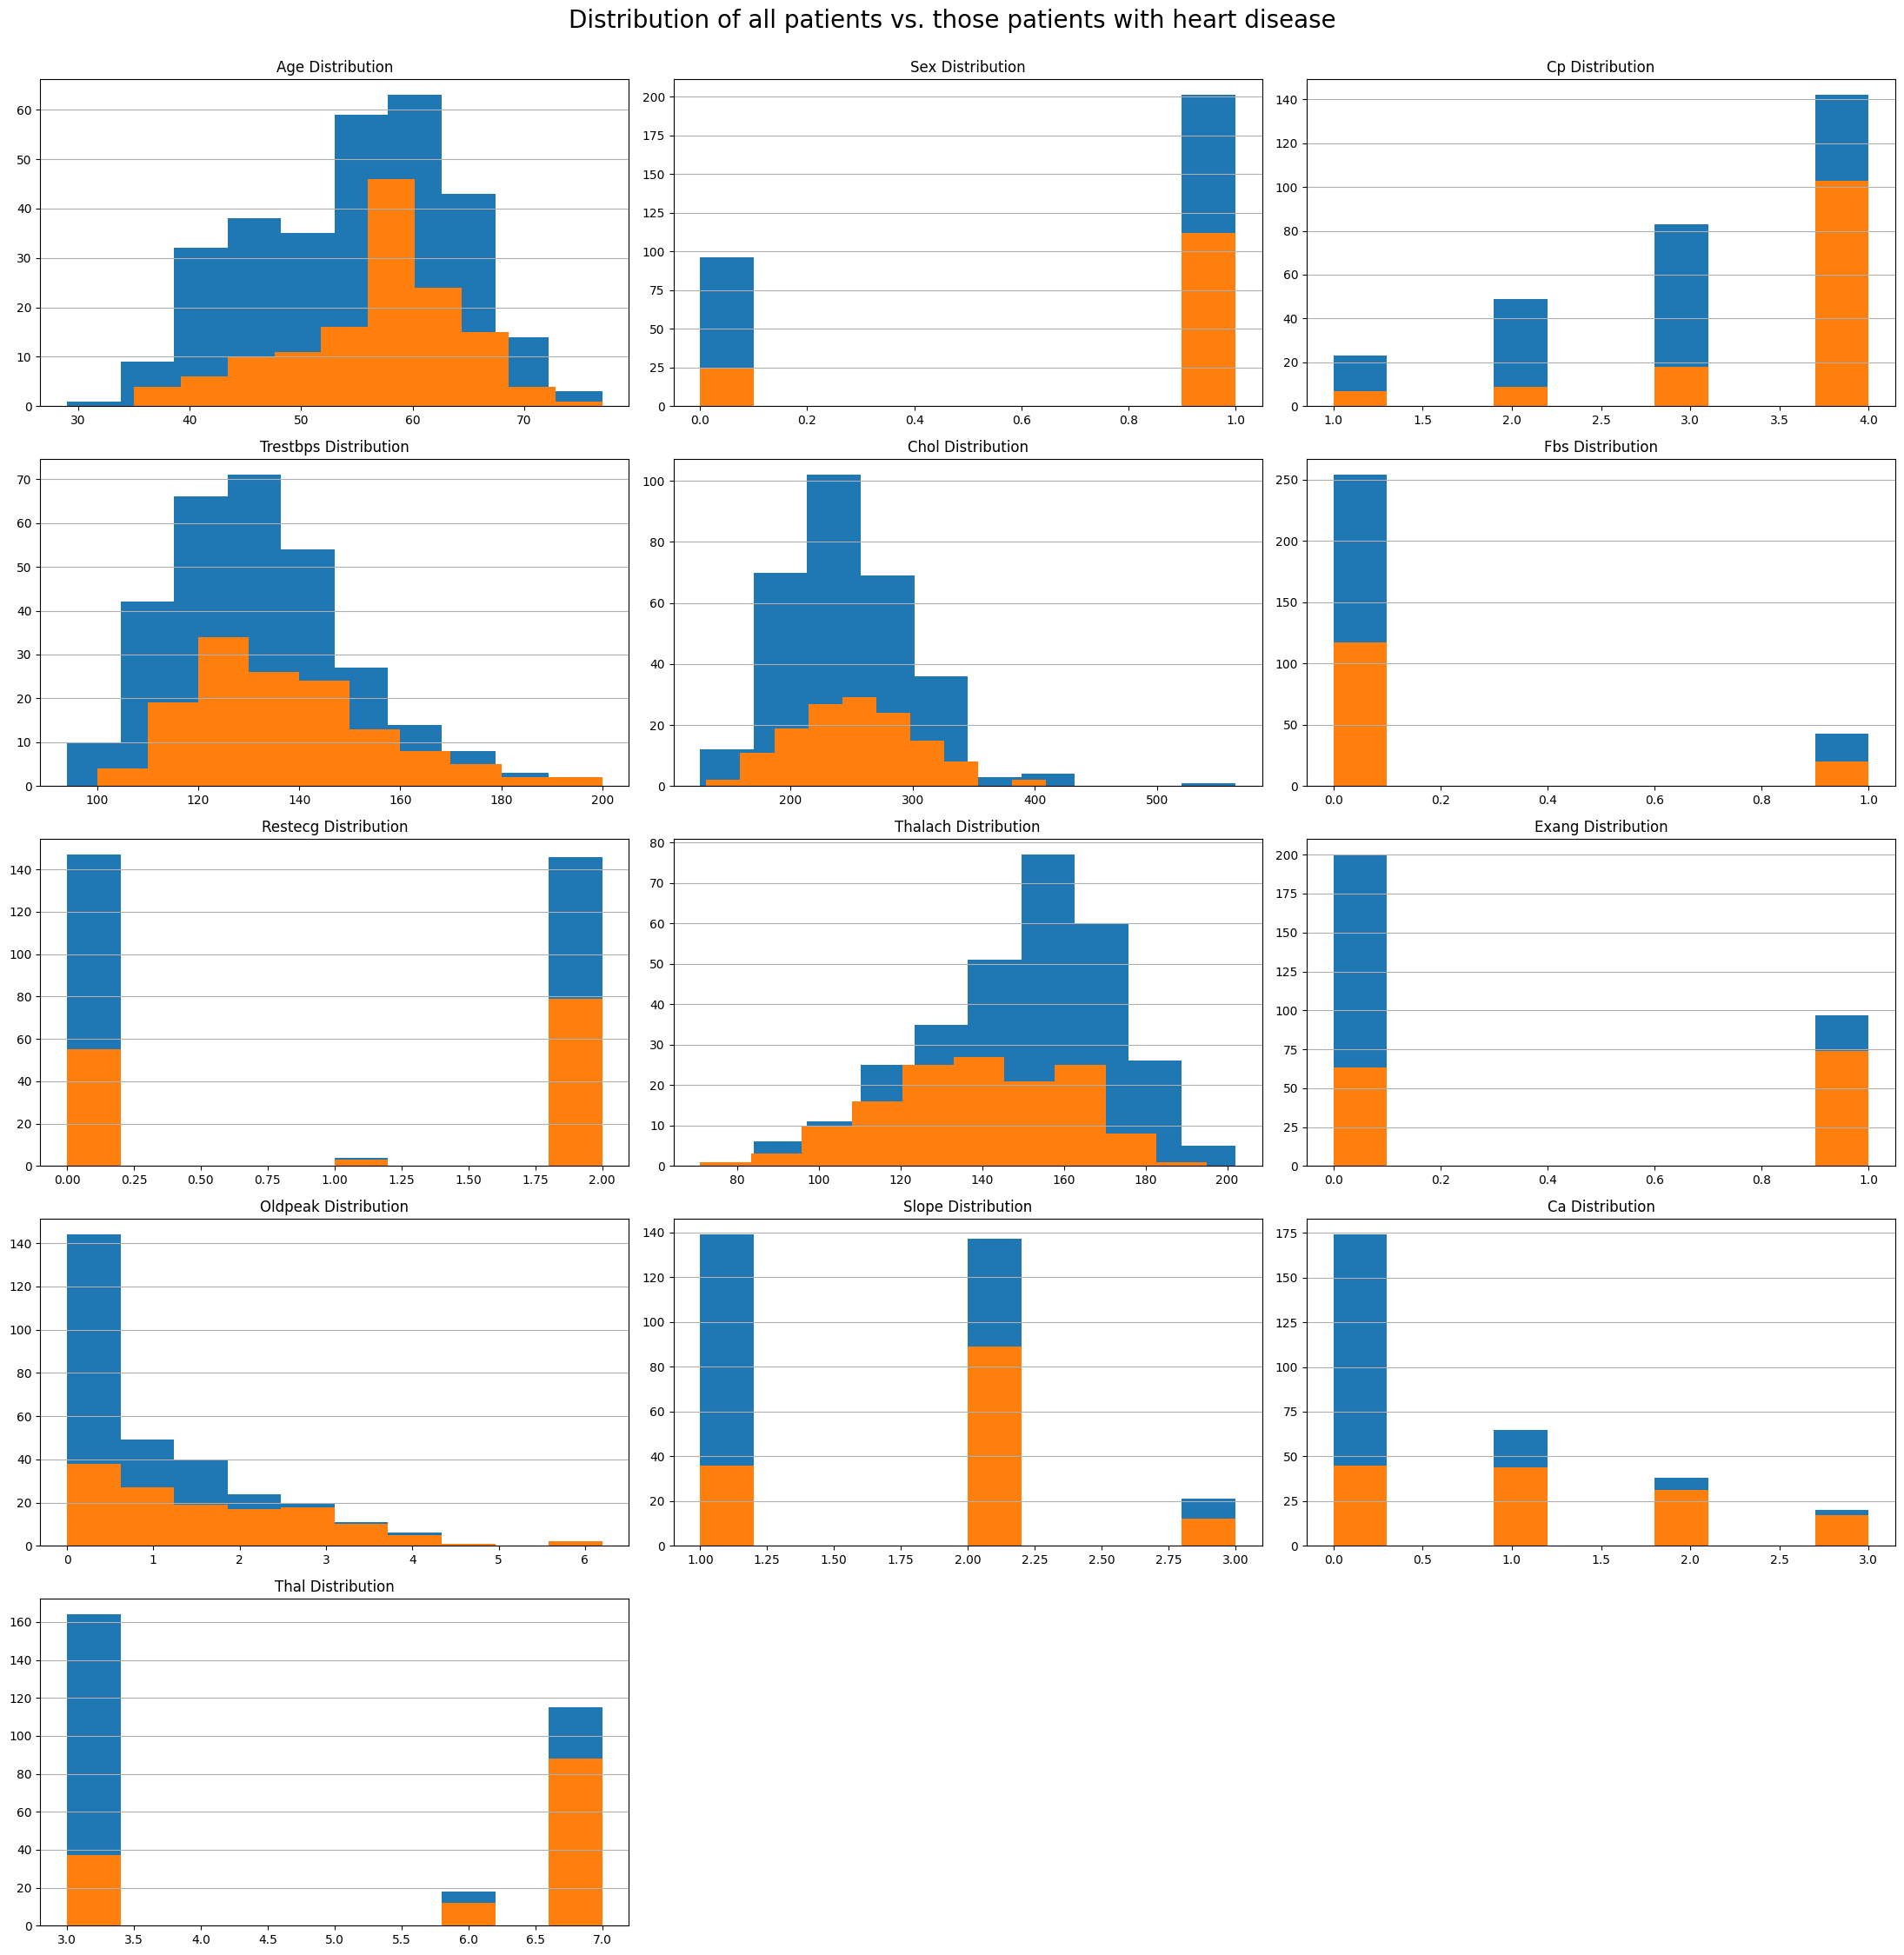

In [324]:
# List of predictor variables columns
pred_vars = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' ]

# Create a subplot with appropriate size
fig = plt.figure(figsize=(22, 22))
fig.subplots_adjust(hspace=2.0)

# Loop through each column and create a bar chart
for i, column in enumerate(pred_vars):
    ax = fig.add_subplot(5, 3, i+1)
    # all patients
    ax.hist(heart_cleaned_df[column])
    # patients with heart disease
    ax.hist(heart_cleaned_df[heart_cleaned_df['present'] == 1][column])
    ax.set_title(f'{column.title()} Distribution')
    ax.yaxis.grid(True)

plt.tight_layout()
fig.suptitle('Distribution of all patients vs. those patients with heart disease', y=1.02, fontsize=20)

plt.show()

When looking at the above histograms, depicting the distribution of the predictor variables in relation to the outcome, the following seem to be good candidates for our model.
 * `age`
 * `sex`
 * `cp`
 * `trestbps`
 * `chol`
 * `thalach`
 * `exang`
 * `oldpeak`
 * `slope`
 * `ca` 
 * `thal`


#### Split-apply-combine
Let's look at which of the continuous variable predictors are meaningful different when comparing the cases and non-cases (i.e. where presences is or not). We do this using the *split-apply-combine* concept.

In [325]:
summary = heart_cleaned_df.groupby('present').agg(
    {
        'age': 'mean',
        'trestbps': 'mean',
        'chol': 'mean',
        'thalach': 'mean',
        'oldpeak': 'mean'
    }
)
summary

,age,trestbps,chol,thalach,oldpeak
present,,,,,
0,52.643750,129.175000,243.493750,158.581250,0.598750
1,56.759124,134.635036,251.854015,139.109489,1.589051


Above, we see differences in the cases and non-case for the continuous variable predictors, but which  are really significant? If we look at percentage difference:

In [326]:
percentage_diff = (summary.loc[1] - summary.loc[0]) / summary.loc[0] * 100
summary.loc['percentage_diff'] = percentage_diff
summary

,age,trestbps,chol,thalach,oldpeak
present,,,,,
0,52.643750,129.175000,243.493750,158.581250,0.598750
1,56.759124,134.635036,251.854015,139.109489,1.589051
percentage_diff,7.817403,4.226852,3.433462,-12.278728,165.394755


We can split the variables in difference higher and lower than +/-5%, in which case the higher difference bucket of variables would contain:
* `age`
* `thalach` (maximum heart rate achieved)
* `oldpeak` (ST depression induced by exercise relative to rest)

This suggests that the range and distribution of the predictor variable for heart-disease patients is significantly different from non-heart-disease patients, i.e. that they can be useful predictors to include in a model because it distinguishes cases from non-cases.

Can we go with only these 3 predictor variables? Without much domain knowledge, I don't know whether for example whether a 3% difference in `chol` (cholesterol) is significant enough to make it a good predictor.

#### Correlations
Let's do one more check on the correlation of the variables with the outcome. We'll first provide dummy variables for the categorical variables, then visualize the correlations using a heatmap.

In [327]:
heart_dummies_df = heart_cleaned_df.copy()

# convert categorical variables to string as pre-requisite for dummy variables
conv_cat_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for var in conv_cat_vars:
    heart_dummies_df[var] = heart_dummies_df[var].astype(str)

# create dummy variables and preview the first 5 rows
heart_dummies_df = pd.get_dummies(heart_dummies_df)
heart_dummies_df.head()

,age,trestbps,chol,thalach,oldpeak,present,sex_0,sex_1,cp_1,cp_2,...,slope_1,slope_2,slope_3,ca_0,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,63,145,233,150,2.3,0,False,True,True,False,...,False,False,True,True,False,False,False,False,True,False
1,67,160,286,108,1.5,1,False,True,False,False,...,False,True,False,False,False,False,True,True,False,False
2,67,120,229,129,2.6,1,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,37,130,250,187,3.5,0,False,True,False,False,...,False,False,True,True,False,False,False,True,False,False
4,41,130,204,172,1.4,0,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False


To identify which features are reasonably correlated to HeartDisease, plot a Pearson's correlation heat map.

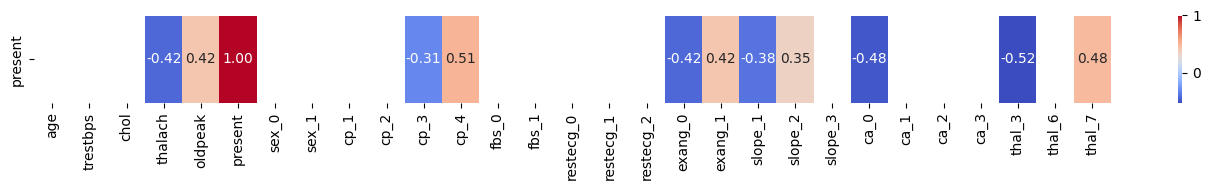

In [328]:
# Calculate Pearson's correlation coefficient
corr_matrix = heart_dummies_df.corr()

# Generate a heatmap
fig, ax = plt.subplots(figsize=(14,2))
sns.heatmap(round(corr_matrix, 2)[corr_matrix.abs() > 0.3].loc[['present']], annot=True, cmap='coolwarm', fmt=".2f", ax=ax)
plt.tight_layout()
plt.show()

The above heatmap provides some interesting correlations:
- `cp_4` (chest pain type = asymptomatic) and `thal_3`(Thalassemia = normal) have the strongest positive and negative correlations respectively, with values of 0.51 and -0.52 respectively.
- `thal_7` (Thalassemia = reversible defect) and `ca_0` (number of major vessels) are next with a medium positive and negative correlations respectively, with values of 0.48 and -0.48 respectively. 
- `exang_0` and `exang_1` (exercise induced angina no & yes), `slope_1`, `slope_2`, `oldpeak` (ST depression induced by exercise relative to rest) and `thalach`(maximum heart rate achieved) have lower correlations of around 0.4 / -0.4
- `cp_3` (chest pain type = non-anginal pain) has the weakest correlation of all the variables which have a correlation with the outcome with -0-31.

There are a few variables which seemed good predictors when we analyzed the distributions, like `age`, `sex`, `chol` and `trestbps`, but are not showing up with any correlation. Perhaps there are some good medical explanation for these, but for now we exclude them.

Before making the final feature selection, we could present these findings so far to a specialist. For now, we go with what we found out during the EDA.

## Feature Selection <a name="feat-selec"></a>

We select 7 features which make most sense based on the EDA done before:
- `cp`
- `thal`
- `ca`
- `exang`
- `slope`
- `oldpeak`
- `thalach`

In [329]:
heart_features_df = heart_dummies_df.copy()

# only keep columns which have the prefixes of our selected features and the outcome
prefs_to_keep = ['cp', 'thal','ca','exang','slope','oldpeak','thalach', 'present']
cols_to_keep = [col for col in heart_features_df.columns if any(col.startswith(prefix) for prefix in prefs_to_keep)]
heart_features_df = heart_features_df[cols_to_keep]
heart_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   thalach  297 non-null    int64  
 1   oldpeak  297 non-null    float64
 2   present  297 non-null    int64  
 3   cp_1     297 non-null    bool   
 4   cp_2     297 non-null    bool   
 5   cp_3     297 non-null    bool   
 6   cp_4     297 non-null    bool   
 7   exang_0  297 non-null    bool   
 8   exang_1  297 non-null    bool   
 9   slope_1  297 non-null    bool   
 10  slope_2  297 non-null    bool   
 11  slope_3  297 non-null    bool   
 12  ca_0     297 non-null    bool   
 13  ca_1     297 non-null    bool   
 14  ca_2     297 non-null    bool   
 15  ca_3     297 non-null    bool   
 16  thal_3   297 non-null    bool   
 17  thal_6   297 non-null    bool   
 18  thal_7   297 non-null    bool   
dtypes: bool(16), float64(1), int64(2)
memory usage: 13.9 KB


## Dividing the Data <a name="div-data"></a>

Next, we will create train and test data for our model.

In [330]:
from sklearn.model_selection import train_test_split

heart_final_df = heart_features_df.copy()

# convert bool columns to int
heart_final_df[heart_final_df.select_dtypes('bool').columns] = heart_final_df.select_dtypes('bool').astype(int)

# split the dataset into training and test sets
X = heart_final_df.drop(['present'], axis=1)
y = heart_final_df["present"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 18)

# check datasets have both cases and non-cases
print(y_train.value_counts())
print(y_test.value_counts())

X_train.info()

present
0    127
1    110
Name: count, dtype: int64
present
0    33
1    27
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 237 entries, 8 to 279
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   thalach  237 non-null    int64  
 1   oldpeak  237 non-null    float64
 2   cp_1     237 non-null    int64  
 3   cp_2     237 non-null    int64  
 4   cp_3     237 non-null    int64  
 5   cp_4     237 non-null    int64  
 6   exang_0  237 non-null    int64  
 7   exang_1  237 non-null    int64  
 8   slope_1  237 non-null    int64  
 9   slope_2  237 non-null    int64  
 10  slope_3  237 non-null    int64  
 11  ca_0     237 non-null    int64  
 12  ca_1     237 non-null    int64  
 13  ca_2     237 non-null    int64  
 14  ca_3     237 non-null    int64  
 15  thal_3   237 non-null    int64  
 16  thal_6   237 non-null    int64  
 17  thal_7   237 non-null    int64  
dtypes: float64(1), int64(17)
memory u

There are cases & non-cases in the train and test datasets.

## Building the Model <a name="build-model"></a>

Let's build the classification model and do some initial assessments.

In [331]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=300) # limit max_iter otherwise we get convergence warning
model.fit(X_train, y_train)
y_pred = model.predict(X_train)

In [332]:
# first accuracy check
train_accuracy = accuracy_score(y_train, y_pred) 
print(f"Accuracy score for the train model: {train_accuracy*100:.1f}%")

Accuracy score for the train model: 87.3%


#### Evaluating the model
A first check on the accuracy of this model based on train data gives a good score of 87%. Note: the doctors should probably give a final say whether 87 is good enough for such a critical topic. 

However, this score is based on train data which could be overly optimistic, and somparing with the results on test data would be more interesting (which we'll look at later).

In addition to using the built-in method to calculate the accuracy, let's manually calculate the accuracy, sensitivity and specificity.

In [333]:
# define a function to be used for calculating the model evaluation metrics
def eval_metrics(y, y_pred, source):
    correct_predictions = sum(y == y_pred)
    total_predictions = len(y_pred)

    tp = sum((y == 1) & (y_pred == 1))
    fn = sum((y == 1) & (y_pred == 0))
    tn = sum((y == 0) & (y_pred == 0))
    fp = sum((y == 0) & (y_pred == 1))
    accuracy = correct_predictions / total_predictions
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    print(f"Accuracy for the {source} model: {accuracy*100:.1f}%")
    print(f"Sensitivity for the {source} model: {sensitivity*100:.1f}%")
    print(f"Specificity for the {source} model: {specificity*100:.1f}%")

In [334]:
# Run the function to display the model evaluation metrics
eval_metrics(y_train, y_pred, 'train')

Accuracy for the train model: 87.3%
Sensitivity for the train model: 84.5%
Specificity for the train model: 89.8%


Of the latter 2 metrics, in my opinion, doctors would not only need to focus on a **good sensitivity score** (85%), but also a **good specificity score** (90%). 

**Sensitivity** measures the ability of the model to correctly identify true positives and *more importantly*, false negatives. It is extremely important that the number of undetected cases (false negatives) of this life-threatening disease is minimized for patients. 

For **Specificity**, is also important but generally considered as less critical than sensitivity in life-threatening disease, as false positives do not lead to missed diasnoses of the disease.

From the train model, although the more important sensitivity metric is lower than the specificity, there is a good balance of the two metrics with a difference of not more than 5%. 

#### Confusion matrix
We could also make use of a confusion matrix to visualize how the predicted values compare to the actual values. Although not required in this project, it could provide a quick visual comparison of different models.

In [335]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred):

    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Present = 0', 'Present = 1'],
                yticklabels=['Present = 0', 'Present = 1'])
    plt.xlabel('Predicted Outcome')
    plt.ylabel('Actual Outcome')
    plt.title('Confusion Matrix')
    plt.show()

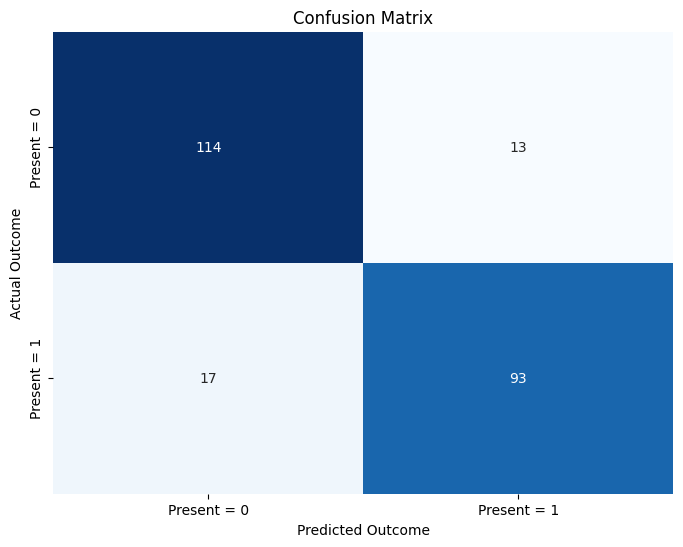

In [336]:
plot_confusion_matrix(y_train, y_pred)

In this case, the train model has 17 false negatives (lower right quadrant), which could be of concerns to the doctors. 

## Interpreting the Intercept <a name="interpret"></a>
Next, we'll examine the coefficients of the logistic regression model on both the log-odds and odds scales. 

In looking at the coefficients, we measure them based on the log-odds and the odds ratio, with the latter being more useful. 

The odds ratio are better interpretable as the indicate better of what is more likely: heart disease present or not. Odds of more than 1 suggests the probability of heart disease presence is greater than no presence; if the odds are less than 1, it suggests the opposite conclusion. 

In [337]:
# log-odds: get the coefficients and transpose the resulting array
coefficients = model.coef_
coefficients = coefficients.transpose()

# display coefficients and predictor names, alonf with the odds ratios
coefficients_df = pd.DataFrame(coefficients, index=X_train.columns, columns=['Log Odds']).sort_values(by='Log Odds', ascending=False)
coefficients_df['Odds Ratio'] = np.exp(coefficients_df['Log Odds'])
coefficients_df

,Log Odds,Odds Ratio
cp_4,0.973370,2.646849
thal_7,0.945177,2.573268
ca_2,0.902078,2.464719
slope_2,0.657334,1.929641
oldpeak,0.609152,1.838872
ca_1,0.434423,1.544072
ca_3,0.274994,1.316523
cp_2,0.192827,1.212673
exang_1,0.191730,1.211343
thalach,-0.016481,0.983654


In [338]:
#### 

Based on the table above, specifically the **Odds Ratio** column, we see that these predictors are important due as their odds ratios are above 1.
- `cp_4` 
- `thal_7`
- `ca_2`
- `slope_2`
- `oldpeak`
- `ca_1`
- `ca_3`
- `cp_2`
- `cp_2`
- `exang_1`

All the above come down to 6 variables from our original dataset, namely:
- `cp` (chest pain type)
- `thal`
- `ca` (number of major vessels)
- `slope` (the slope of the peak exercise ST segment)
- `oldpeak` (ST depression induced by exercise relative to rest)
- `exang`(exercise induced angina)

Our list of predictors to include as features in our model included one more, namely `thalach`(maximum heart rate achieved), has a odds ratio under but very close to 1 (0.98). We could rerun the model without this feature at a later point.

## Final Model Evaluation on Test Set <a name="model-eval"></a>

Finally, we can assess the predictive ability of our logistic regression model.

In [339]:
# display the test data model's evaluation metrics
y_pred = model.predict(X_test)
eval_metrics(y_test, y_pred, 'test')

Accuracy for the test model: 76.7%
Sensitivity for the test model: 70.4%
Specificity for the test model: 81.8%


Comparing the evaluation of train and test data:

| Metric       | Train | Test |
|--------------|-------------|------------|
| Accuracy     | 87.3%       | 76.7%      |
| Sensitivity  | 84.5%       | 70.4%      |
| Specificity  | 89.8%       | 81.8%      |

Accuracy reduced by more than 10% in the test model, so there is a risk that our model is overfitting. Also, what's of concern is that our test model's sensitivity has reduced by 14%, which carries the risk of not correctly identifying false negatives. Specificity also reduced but not by as much (8%)

## Final Conclusions <a name="final"></a>

In summary, our model performed worse on unseen data, with an accuracy of 77%. Its up to the doctors to decide whether this is good enough, however, for doing initial screenings it may be enough. What's concerning is the potential number of missed diagnoses due to false negatives. 

Potential improvements for a model with higher accuracy and sensitivity could be:
- changing the choice of predictors and the number of predictors
- using scaled data in addition to unscaled data
- using diffent ML algorithms for classification, like Random Forest or Gradient Descent